In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chemMap as cm
import mineralML as mm

# this allows figures to be saved as svg files with the text preserved
# plt.rcParams['svg.fonttype'] = 'none'
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

In [2]:
# load sample maps as comparisons
Lab = cm.loadwt(path = 'Data/LargeScaleMaps/Standards/Labradorite/')
Aug = cm.loadwt(path = 'Data/LargeScaleMaps/Standards/Augite/')

Lab = cm.calcOxides(Data = Lab, Oxide = list(Lab.keys()))
Aug = cm.calcOxides(Data = Aug, Oxide = list(Aug.keys()))

Lab = cm.calcRatios(Dat = Lab, ratios = ['AnK'], oxide = True)
Aug = cm.calcRatios(Dat = Aug, ratios = ['Mg#'], oxide = True)

In [3]:
import pickle
with open('GalapGabbrosQuantData.pkl', 'rb') as f:
    Quant = pickle.load(f)

In [4]:
for s in Quant:
    Quant[s] = cm.calcRatios(Dat = Quant[s], oxide = True, ratios = ['AnK', 'Mg#', 'Cr#'])

/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/chemMap/src/chemMap/ratios.py:57: RuntimeWarning: invalid value encountered in divide
  Data[r] = (Data['CaO']/56.0774)/(Data['CaO']/56.0774+2*Data['Na2O']/61.9789+2*Data['K2O']/94.2)
/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/chemMap/src/chemMap/ratios.py:51: RuntimeWarning: invalid value encountered in divide
  Data[r] = (Data['MgO']/40.3044)/(Data['FeO']/71.844+Data['MgO']/40.3044)
/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/chemMap/src/chemMap/ratios.py:60: RuntimeWarning: invalid value encountered in divide
  Data[r] = (Data['Cr2O3']/(element_properties['Cr'][3]*element_properties['Cr'][2]+element_properties['Cr'][4]*15.999))/(Data['Cr2O3']/(element_properties['Cr'][3]*element_properties['Cr'][2]+element_properties['Cr'][4]*15.999) + Data['Al2O3']/(element_properties['Al'][3]*element_properties[

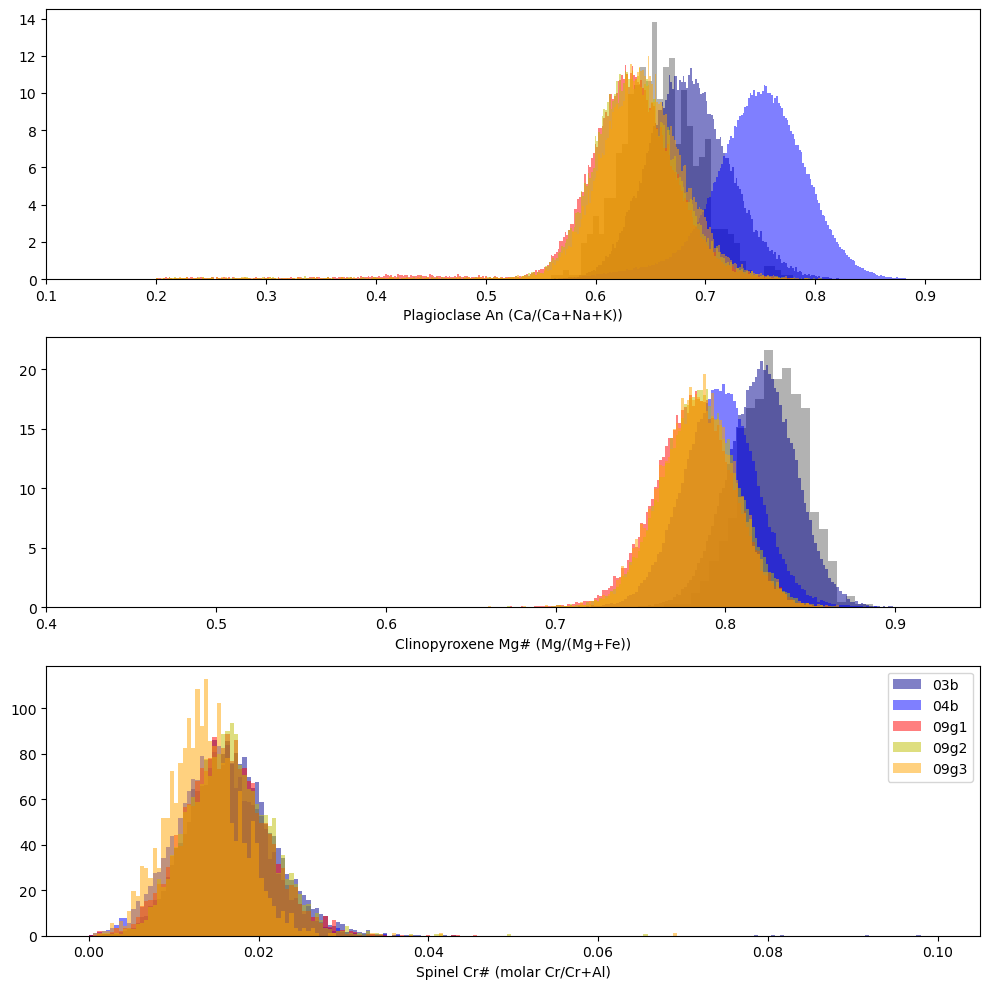

In [16]:
color = {'03b': (0,0,0.56), '04b': 'b', '09g1': 'r', '09g2': 'y', '09g3': 'orange'}
f, a = plt.subplots(3,1, figsize = (10,10))
a[0].hist(Lab['AnK'].flatten(), bins = np.linspace(0.2,1,150), alpha = 0.5, color = (0.4,0.4,0.4), density = True)
a[1].hist(Aug['Mg#'].flatten(), bins = np.linspace(0.2,1,150), alpha = 0.5, color = (0.4,0.4,0.4), density = True)
for c in color:
    a[0].hist(Quant[c]['AnK'][(Quant[c]['Mineral'] == "Plagioclase")& (Quant[c]['PhaseProb'] > 0.9)], 
              bins = np.linspace(0.2,1,500), alpha = 0.5, color = color[c], density = True)
    
    a[1].hist(Quant[c]['Mg#'][(Quant[c]['Mineral'] == 'Clinopyroxene') & (Quant[c]['PhaseProb'] > 0.9)],
              bins = np.linspace(0.2,1,500), alpha = 0.5, color = color[c], density = True)
    
    a[2].hist(Quant[c]['Cr#'][(Quant[c]['Mineral'] == 'Spinel') & (Quant[c]['PhaseProb'] > 0.9)],
              bins = np.linspace(0.0,0.1,200), alpha = 0.5, color = color[c], density = True, label = c)
    
a[0].set_xlabel('Plagioclase An (Ca/(Ca+Na+K))')
a[0].set_xlim([0.1,0.95])
a[1].set_xlabel('Clinopyroxene Mg# (Mg/(Mg+Fe))')
a[1].set_xlim([0.4,0.95])
a[2].set_xlabel('Spinel Cr# (molar Cr/Cr+Al)')
a[2].legend()


f.tight_layout()

plt.savefig('histograms.svg', dpi = 600, format = 'svg')

In [1]:
for s in Quant:
    cm.plot_CompositionMap(Data = Quant[s], Element = "Mg#", Phase = "Clinopyroxene", cmap = "YlGnBu", background = 'k',
                           Bounds = [0.72,0.87])

In [2]:
for s in Quant:
    f, a = cm.plot_CompositionMap(Data = Quant[s], Element = "AnK", Phase = "Plagioclase", cmap = "Blues", background = 'k',
                           Bounds = [np.nanmean(Quant[s]['AnK'][Quant[s]['Mineral'] == "Plagioclase"]) - 3*np.std(Quant[s]['AnK'][Quant[s]['Mineral'] == "Plagioclase"]),
                                      np.nanmean(Quant[s]['AnK'][Quant[s]['Mineral'] == "Plagioclase"]) + 3*np.std(Quant[s]['AnK'][Quant[s]['Mineral'] == "Plagioclase"])])
    
    # plt.savefig(s + '_map.svg', dpi = 600, format = 'svg')